# Aplicar técnicas de Mineração de Dados, utilizando o algoritmo de Clusterização para agrupar as informações e notas dos candidatos

## Área de agrupamentos: Matemática; Fundamentos da Computação; Tecnologias da Computação


In [2]:
%run ../services/imports.py

importing Jupyter notebook from /home/jean/project/project_dataScience_POSCOMP/notebooks/../services/especialidades.ipynb


## Descrição dos dados

In [3]:
dados = pd.read_csv('../dados/df_poscomp.csv')
# dados = dados.drop(columns='INSCRICAO')
dados.head()

,SEXO,ESTADO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,Lógica Matemática,...,Processamento de Imagens,Banco de Dados,IDADE,matematica,fund_computacao,tec_computacao,total,linhas_pesquisas,area_concentration,REGIAO
0,M,RS,metodologias e técnicas de computação,3,2,3,2,2,2,2,...,2,1,21,16,22,12,50,engenharia de software,informatica,sul
1,M,SP,engenharia de software,0,1,1,1,0,0,1,...,2,1,25,4,16,8,28,engenharia de software,informatica,sudeste
2,M,PA,sistemas de informação,1,0,1,1,0,0,1,...,1,0,30,4,13,7,24,sistemas de computação,computacao,norte
3,F,AM,computação gráfica,0,0,2,2,1,0,1,...,1,1,19,6,15,11,32,Outros,informatica,norte
4,M,MS,sistemas de computação,1,2,3,1,1,2,2,...,1,0,21,12,20,11,43,sistemas de computação,computacao,centro_oeste


> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|1|Masculino|
|0|Feminino|

> ### UF
> ***

|Código|Descrição|
|---|---|
|0|AC|
|1|AL|
|2|AP|
|3|AM|
|4|BA|
|5|CE|
|6|DF|
|7|ES|
|8|GO|
|9|MA|
|10|MT|
|11|MS|
|12|MG|
|13|PA|
|14|PB|
|15|PR|
|16|PE|
|17|PI|
|18|RJ|
|19|RN|
|20|RS|
|21|RO|
|22|RR|
|23|SC|
|24|SP|
|25|SE|
|26|TO|

> ### Cargo
> ***

|Código|Descrição|
|---|---|
|0|Mestrado/Doutorado|
|1|Autoavaliação|

> ### Região
> ***

|Código|Descrição|
|---|---|
|0|norte|
|1|nordeste|
|2|centro_oeste|
|3|sudeste|
|4|sul|

> ### Situação
> ***

|Código|Descrição|
|---|---|
|0|Ausente|
|1|Presente|

## Analise Explorária dos Dados

Quantas pessoas são do sexo masculino e feminino

In [4]:
frequencia_sexo = dados['SEXO'].value_counts() 

percentual_sexo = dados['SEXO'].value_counts(normalize = True) * 100 

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentagem (%)': percentual_sexo.round(2)})
dist_freq_qualitativas.rename (index = {1: 'Masculino', 0: 'Feminino', 3: 'Total'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
SEXO,,
M,8199,82.88
F,1694,17.12


Qual a média, mediana e máximo?

In [5]:
estados = {
    0: 'Acre',
    1: 'Alagoas',
    2: 'Amapá',
    3: 'Amazonas',
    4: 'Bahia',
    5: 'Ceará',
    6: 'Distrito Federal',
    7: 'Espírito Santo',
    8: 'Goiás',
    9: 'Maranhão',
    10: 'Mato Grosso',
    11: 'Mato Grosso do Sul',
    12: 'Minas Gerais',
    13: 'Pará',
    14: 'Paraíba',
    15: 'Paraná',
    16: 'Pernambuco',
    17: 'Piauí',
    18: 'Rio de Janeiro',
    19: 'Rio Grande do Norte',
    20: 'Rio Grande do Sul',
    21: 'Rondônia',
    22: 'Roraima',
    23: 'Santa Catarina',
    24: 'São Paulo',
    25: 'Sergipe',
    26: 'Tocantins'
}

estados_brasileiros = {
    0: 'AC',
    1: 'AL',
    2: 'AP',
    3: 'AM',
    4: 'BA',
    5: 'CE',
    6: 'DF',
    7: 'ES',
    8: 'GO',
    9: 'MA',
    10: 'MT',
    11: 'MS',
    12: 'MG',
    13: 'PA',
    14: 'PB',
    15: 'PR',
    16: 'PE',
    17: 'PI',
    18: 'RJ',
    19: 'RN',
    20: 'RS',
    21: 'RO',
    22: 'RR',
    23: 'SC',
    24: 'SP',
    25: 'SE',
    26: 'TO'
}

In [6]:
regioes = {
    0: 'Norte',
    1: 'Nordeste',
    2: 'Centro-Oeste',
    3: 'Sudeste',
    4: 'Sul'
}

In [7]:
renda_estatisticas_por_uf = dados.groupby(['ESTADO']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                            'fund_computacao': ['mean', 'median', 'max', 'std'],
                                                            'tec_computacao': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index= estados)

matematica                      fund_computacao                       \
             mean median max       std            mean median max       std   
ESTADO                                                                        
AC       8.500000    8.0  15  4.932883       14.000000   14.0  17  2.581989   
AL       8.080000    8.0  15  2.813009       13.653333   14.0  21  3.189721   
AM       6.914286    7.0  15  2.332771       13.114286   13.0  20  2.789955   
AP       5.545455    5.0  12  3.173756       10.363636   10.0  14  2.292280   
BA       7.435185    8.0  15  2.871950       14.222222   14.0  24  3.573875   
CE       8.317121    8.0  18  3.089727       14.206226   14.0  25  3.570002   
DF       9.393443    9.0  20  3.843951       15.704918   15.0  23  4.314102   
ES       8.356083    8.0  19  3.340440       14.023739   14.0  28  3.685481   
GO       7.321867    7.0  17  2.845286       13.616708   13.0  24  3.286862   
MA       7.505119    7.0  17  2.824333       13.204778   13.0  21  3.424185   
MG       8.372470    8.0  20  3.136891       14.560324   14.0  26  3.625975   
MS       7.755725    7.0  18  3.022260       13.641221   14.0  24  3.475282   
MT       7.264463    7.0  13  2.383165       13.512397   13.0  23  3.398813   
PA       6.913758    6.0  17  2.530626       12.361396   12.0  25  3.295587   
PB       7.795812    8.0  19  2.841104       14.204188   14.0  26  3.454780   
PE       8.743590    8.0  16  3.345995       14.102564   14.0  25  3.537728   
PI       7.000000    7.0  16  2.662134       13.108359   13.0  22  3.557517   
PR       7.959805    8.0  20  2.981175       14.401949   14.0  25  3.682085   
RJ       9.971429   10.0  19  3.367445       15.167857   15.0  24  3.566627   
RN       8.079710    7.5  20  3.451566       14.014493   14.0  25  3.813127   
RO       7.083333    8.0  10  2.391589       12.166667   12.0  17  2.886751   
RR       5.200000    5.0   7  1.483240       10.800000   11.0  13  1.483240   
RS       8.081498    8.0  19  3.153194       14.432819   14.0  28  3.876668   
SC       7.969751    8.0  20  3.021753       14.300712   14.0  26  3.717804   
SE       8.310680    8.0  20  3.357839       14.553398   14.0  22  3.599369   
SP       8.567282    8.0  20  3.309866       14.228496   14.0  27  3.686075   
TO       7.651163    7.0  14  2.428832       14.000000   14.0  23  4.017817   

       tec_computacao                       
                 mean median max       std  
ESTADO                                      
AC           7.500000    7.0  10  1.914854  
AL           8.046667    8.0  15  2.483061  
AM           7.485714    7.5  12  2.465665  
AP           8.000000    8.0  11  1.788854  
BA           7.888889    8.0  15  2.569895  
CE           8.171206    8.0  16  2.540485  
DF           8.688525    8.0  15  2.240097  
ES           7.910979    8.0  16  2.731719  
GO           7.626536    8.0  15  2.507738  
MA           7.955631    8.0  14  2.438576  
MG           7.931174    8.0  16  2.558101  
MS           7.368957    7.0  16  2.562236  
MT           7.793388    8.0  14  2.316309  
PA           7.433265    7.0  15  2.411214  
PB           7.947644    8.0  16  2.470253  
PE           7.256410    7.0  15  3.041104  
PI           7.715170    8.0  15  2.532887  
PR           8.133983    8.0  15  2.476047  
RJ           8.307143    8.0  15  2.548164  
RN           7.586957    8.0  16  2.665619  
RO           7.416667    7.5  10  2.151462  
RR           7.200000    7.0   9  1.095445  
RS           8.196035    8.0  18  2.627374  
SC           8.327402    8.0  16  2.527481  
SE           8.184466    8.0  15  2.710718  
SP           7.995251    8.0  16  2.552610  
TO           8.162791    8.0  14  2.308682

#### Geração de gráficos da áreas de matemática, fundamentos da computação e tecnologia da computação

In [8]:
media_estatisticas_por_uf = dados.groupby(['ESTADO']).agg({'matematica': ['mean'],
                                                            'fund_computacao': ['mean'],
                                                            'tec_computacao': ['mean']})
media_estatisticas_por_uf = media_estatisticas_por_uf.rename(index=estados_brasileiros)

In [9]:
por_sexo_estado = dados.groupby(['ESTADO', 'SEXO']).size().reset_index(name='candidatos')

por_sexo_estado['ESTADO'] = por_sexo_estado['ESTADO'].replace(estados_brasileiros)
por_sexo_estado['SEXO'] = por_sexo_estado['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

total_inscritos_sexo = por_sexo_estado['candidatos'].sum()

# Calcula a porcentagem de candidatos inscritos por região
por_sexo_estado['porcentagem'] = (por_sexo_estado['candidatos'] / total_inscritos_sexo) * 100
por_sexo_estado

,ESTADO,SEXO,candidatos,porcentagem
0,AC,M,4,0.040433
1,AL,F,18,0.181947
2,AL,M,132,1.334277
3,AM,F,19,0.192055
4,AM,M,51,0.515516
5,AP,F,1,0.010108
6,AP,M,10,0.101082
7,BA,F,17,0.171839
8,BA,M,91,0.919842
9,CE,F,90,0.909734


In [10]:
# total_inscritos = por_regiao['candidatos'].sum()

# # Calcula a porcentagem de candidatos inscritos por região
# por_regiao['porcentagem'] = (por_regiao['candidatos'] / total_inscritos) * 100
# colors = ['#408F70', '#FE0000', '#FF8C4D', '#E6EC16', '#9091C9']

# explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# # Criação do gráfico de pizza
# plt.figure(figsize=(8, 6))
# plt.pie(por_regiao['porcentagem'], labels=por_regiao['REGIAO'], autopct='%.2f%%',
#         colors=colors, explode=explode, shadow=True, startangle=60)
# plt.title("Porcentagem de inscritos no POSCOMP por região", fontsize=14)
# plt.axis('equal')
# plt.show()

In [11]:
    # plt.figure(figsize=(8,6))
    # df_media_regiao = por_regiao.sort_values(['candidatos'], ascending=False)
    # sns.set_style(style='ticks')
    # plot = sns.barplot(data=df_media_regiao,
    #             y='candidatos',
    #             x='REGIAO',
    #             # hue='',
    #             dodge=False,
    #             color='Blue',
    #            );
    # for p in plot.patches:
    #     plt.annotate(int(p.get_height()),
    #                 (p.get_x() + p.get_width() / 2,p.get_height()),
    #                 ha='center', va='bottom',fontsize=12)
    # # Adicionar legenda nos eixos
    # # plt.legend(fontsize=10)
    # plt.title("Número de inscritos no POSCOMP no periodo de 2016-2019", fontsize=12)
    # plt.xlabel('Regiões', fontsize=12)
    # plt.ylabel('Quantidade de participantes', fontsize=12)
    # plt.xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    # plt.show()

In [12]:
# lista_eixo = {'matematica': 'Matemática',
#            'fundamentos_computacao': 'Fundamentos da Computação',
#            'tecnologia_computacao': 'Tecnologia da Computação'}
# for i in lista_eixo:
#     plt.figure(figsize=(18,10))
#     df_media_uf = por_uf.sort_values([i], ascending=False)
#     sns.set_theme(style="ticks")
#     plot = sns.barplot(data=df_media_uf,
#                 y=i,
#                 x='ESTADO',
#                 hue='REGIAO',
#                 dodge=False,
#                );
#     for p in plot.patches:
#         plt.annotate('{0:.2f}'.format(p.get_height()),
#                     (p.get_x() + p.get_width() / 2,p.get_height()),
#                     ha='center', va='bottom')
#     # Adicionar legenda nos eixos
#     plt.legend(fontsize=10)
#     plt.title(lista_eixo[i], fontsize=18)
#     plt.xlabel('Unidade Federativa', fontsize=18)
#     plt.ylabel('Médias das notas', fontsize=18)
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize=15)
#     plt.show()

In [13]:
renda_estatisticas_por_regiao = dados.groupby(['REGIAO']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                              'fund_computacao': ['mean', 'median', 'max', 'std'],
                                                              'tec_computacao': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_regiao.rename(index= regioes)

matematica                      fund_computacao             \
                   mean median max       std            mean median max   
REGIAO                                                                    
centro_oeste   7.617108    7.0  20  2.975611       13.743381   14.0  24   
nordeste       7.821954    8.0  20  2.977742       13.882642   14.0  26   
norte          6.939873    7.0  17  2.533364       12.515823   12.0  25   
sudeste        8.589005    8.0  20  3.284721       14.389645   14.0  28   
sul            8.010476    8.0  20  3.059508       14.389350   14.0  28   

                       tec_computacao                       
                   std           mean median max       std  
REGIAO                                                      
centro_oeste  3.479272       7.609980    7.0  16  2.507811  
nordeste      3.538572       7.946899    8.0  16  2.534642  
norte         3.300541       7.496835    7.0  15  2.385905  
sudeste       3.666966       7.989859    8.0  16  2.571436  
sul           3.767750       8.206024    8.0  18  2.549489

In [14]:
dados_teste = dados.copy()

## K-means

In [15]:
from sklearn.cluster import KMeans

In [16]:
dataset = dados.copy()
dataset_kmeans = dataset.loc[:,['SEXO','ESTADO','IDADE','REGIAO','matematica','fund_computacao','tec_computacao','total','ESPECIALIDADE']]
dataset_kmeans.head()

,SEXO,ESTADO,IDADE,REGIAO,matematica,fund_computacao,tec_computacao,total,ESPECIALIDADE
0,M,RS,21,sul,16,22,12,50,metodologias e técnicas de computação
1,M,SP,25,sudeste,4,16,8,28,engenharia de software
2,M,PA,30,norte,4,13,7,24,sistemas de informação
3,F,AM,19,norte,6,15,11,32,computação gráfica
4,M,MS,21,centro_oeste,12,20,11,43,sistemas de computação


In [17]:
X = dataset_kmeans.drop(['ESPECIALIDADE'], axis=1)
y = dataset_kmeans['ESPECIALIDADE']

### Padronizando os dados

In [18]:
def encode_categorical_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

categorical_columns = ["ESPECIALIDADE",'SEXO','REGIAO','ESTADO']
X_dataset = encode_categorical_columns(dataset_kmeans, categorical_columns)

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
dataset_kmeans = min_max_scaler.fit_transform(dataset_kmeans)

### Encontrar o número ideal de cluster

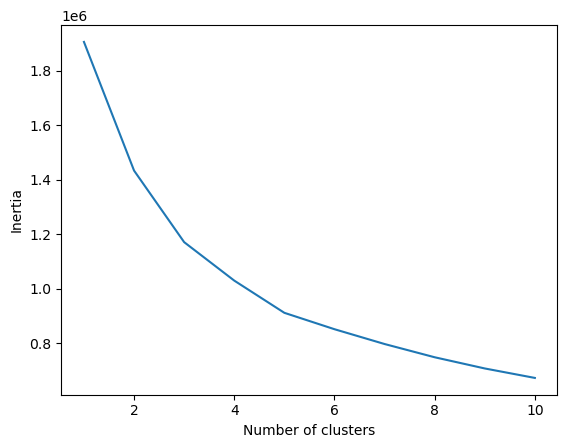

In [20]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_dataset)

    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

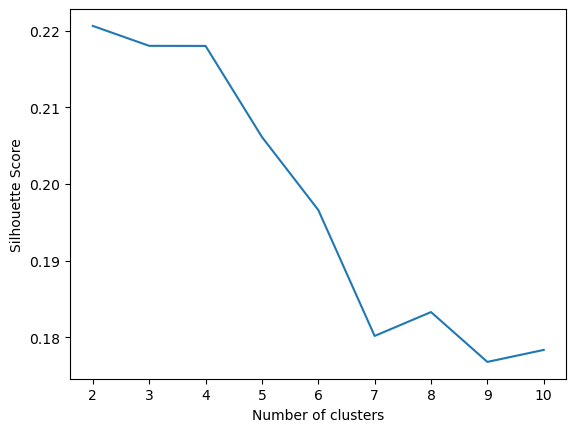

In [21]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_dataset)

    score = silhouette_score(X_dataset, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

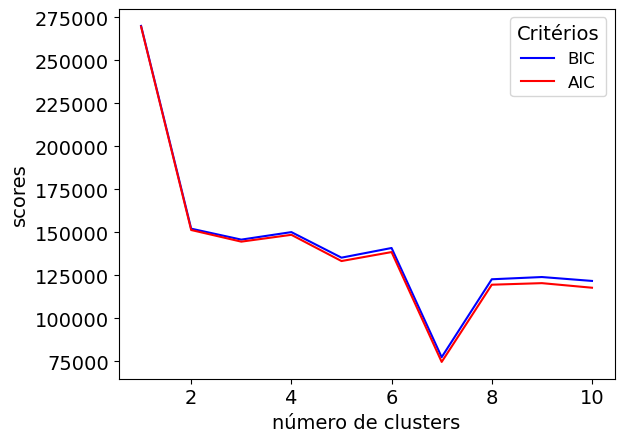

In [22]:
from sklearn.mixture import GaussianMixture

bic_values = []
aic_values = []

sns.set_palette(["blue", "red"])

for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_dataset)
    

    bic_values.append(gmm.bic(X_dataset))
    aic_values.append(gmm.aic(X_dataset))

plt.plot(range(1, 11), bic_values, label="BIC")
plt.plot(range(1, 11), aic_values, label="AIC")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('scores', fontsize=14)
plt.xlabel('número de clusters', fontsize=14)
legend = plt.legend(title='Critérios', fontsize=12)
legend.get_title().set_fontsize(14)
# plt.savefig('imagens/metodoBIC_AIC.eps', dpi=400, bbox_inches='tight', format='eps')
plt.show()

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init='auto',max_iter=300,init='k-means++')
    kmeans.fit(X_dataset)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

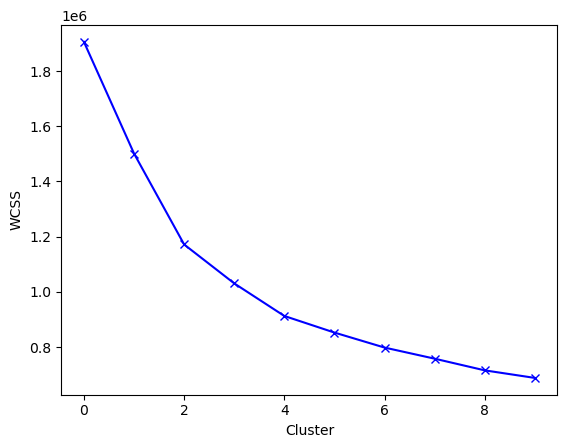

In [24]:
plt.plot(wcss, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

### Aplicação do K-meas

In [25]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2],
    'algorithm': ['auto', 'full', 'elkan'],
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizar a busca em grade no conjunto de dados
grid_search.fit(X)

# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

NameError: name 'model' is not defined

In [ ]:
model = KMeans(n_clusters=4, n_init=10 ,max_iter=1000, init='k-means++', algorithm='auto', tol=0.0001)
labels = model.fit_predict(X_dataset)
dataset_kmeans.loc[:, 'cluster'] = model.predict(X_dataset)
centroids = model.cluster_centers_

In [ ]:
# Agrupar por cluster e especialidade, contando o número de ocorrências
cluster_specialty_counts = dataset_kmeans.groupby(['cluster', 'ESPECIALIDADE']).size().reset_index(name='count')

# Encontrar a especialidade com a maior contagem para cada cluster
max_specialties = cluster_specialty_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

print(max_specialties)

In [ ]:
centroids

In [ ]:
from sklearn import metrics
sse = model.inertia_
silhouette_avg = metrics.silhouette_score(dataset_kmeans, labels)

print("SSE:", sse)
print("Coeficiente de Silhueta:", silhouette_avg)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(dataset['matematica'], dataset['fundamentos_computacao'],
                    dataset['tecnologia_computacao'], c=dataset['cluster'], cmap='seismic')

ax.set_xlabel('Matemática', labelpad=10)
ax.set_ylabel('Fundamentos da Computação', labelpad=10)
fig.text(0.85, 0.5, 'Tecnologia da Computação', va='center', rotation='vertical', fontsize=12)

legend1 = ax.legend(*sctt.legend_elements(), title='Grupo')
ax.add_artist(legend1)

# plt.savefig('imagens/grafico_kmeans.eps', dpi=300, bbox_inches='tight', format='eps')

plt.show()

#### Metricas do desempenho do algoritmo

In [ ]:
from sklearn.metrics import pairwise_distances

# Soma dos Quadrados dos Erros (SSE):
def calculate_sse(data, labels, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    sse = 0
    for i, label in enumerate(labels):
        sse += distances[i][label] ** 2
    return sse

In [ ]:
# Coeficiente de Silhueta:
from sklearn.metrics import silhouette_score

def calculate_silhouette(data, labels):
    silhouette = silhouette_score(data, labels)
    return silhouette

In [ ]:
# Índice de Davies-Bouldin:
def calculate_davies_bouldin(data, labels, centroids):
    distances = pairwise_distances(centroids, centroids, metric='euclidean')
    n_clusters = len(np.unique(labels))
    cluster_distances = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        centroid_distances = pairwise_distances(cluster_points, [centroids[i]], metric='euclidean')
        cluster_distances[i] = np.mean(centroid_distances)
    db_index = np.sum(distances) / np.max(cluster_distances)
    return db_index


In [ ]:
# Índice de Calinski-Harabasz:
from sklearn.metrics import calinski_harabasz_score

def calculate_calinski_harabasz(data, labels):
    ch_index = calinski_harabasz_score(data, labels)
    return ch_index


In [ ]:
# Índice de Dunn:
import numpy as np

def calculate_dunn(data, labels):
    distances = pairwise_distances(data, metric='euclidean')
    max_intra_cluster_distance = np.max([np.max(distances[labels == label][:, labels == label]) for label in np.unique(labels)])
    min_inter_cluster_distance = np.min([np.min(distances[labels == label][:, labels != label]) for label in np.unique(labels)])
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index


In [ ]:
distances = pairwise_distances(X_dataset_kmeans, centroids, metric='euclidean')
sse = np.sum(np.min(distances, axis=1))

# Calcular Coeficiente de Silhueta
silhouette = silhouette_score(X_dataset_kmeans, labels)

# Calcular Índice de Davies-Bouldin
davies_bouldin = calculate_davies_bouldin(X_dataset_kmeans, labels, centroids)

# Calcular Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_dataset_kmeans, labels)

# Calcular Índice de Dunn
dunn = calculate_dunn(X_dataset_kmeans, labels)

# Imprimir os resultados
print(f"SSE: {sse}")
print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Dunn: {dunn}")

In [ ]:
import matplotlib.colors as mcolors
column_labels = {
    'matematica': 'Matemática',
    'fundamentos_computacao': 'Fundamentos da Computação',
    'tecnologia_computacao': 'Tecnologia da Computação'
}
colors = ['#E30000', '#0000BC', ]  # Azul e Vermelho

cmap = mcolors.LinearSegmentedColormap.from_list('custom_seismic', colors, N=dataset['cluster'].nunique())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, coluna in enumerate(['matematica', 'fundamentos_computacao', 'tecnologia_computacao']):
    ax = axes[i]
    
    for idx, cluster in enumerate(dataset['cluster'].unique()):
        subset = dataset[dataset['cluster'] == cluster]
        color = colors[idx]  # Seleciona a cor da paleta 'seismic' para cada cluster
        ax.hist(subset[coluna], bins=10, alpha=0.5, label=f'Cluster {cluster}', color=color)
    
    # ax.set_title(f'Histograma de {coluna} por cluster')
    ax.set_xlabel(column_labels[coluna], fontsize=18)
    ax.set_ylabel('Frequência', fontsize=18)
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Definir tamanho dos rótulos dos eixo


plt.tight_layout()

plt.savefig('imagens/histograma', dpi=600, bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

disciplinas = ['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear', 'Geometria Analítica',
               'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática',
               'Organização de Arquivos e Dados', 'Técnicas de Programação', 'Circuitos Digitais',
               'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
               'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais',
               'Arquitetura e Organização de Computadores', 'Redes de Computadores', 'Computação Gráfica',
               'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos', 'Compiladores',
               'Processamento de Imagens', 'Banco de Dados']

num_disciplinas = len(disciplinas)
num_clusters = len(dataset['cluster'].unique())

# Definindo as cores da paleta 'seismic' para representar os clusters
cluster_colors = ['b', 'r']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

for i, disciplina in enumerate(disciplinas):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    for cluster, color in zip(range(num_clusters), cluster_colors):
        data = dataset[dataset['cluster'] == cluster]
        mean_by_year = data.groupby('ANO')[disciplina].mean()
        max_mean = mean_by_year.max()  # Encontra o valor máximo nas médias para normalização
        normalized_mean = mean_by_year / max_mean * 100  # Normaliza as médias em porcentagem
        ax.plot(normalized_mean.index, normalized_mean.values, marker='o', label=f'Cluster {cluster}', color=color)
    
    ax.set_title(disciplina)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de Desempenho (%)')
    ax.legend()

if num_disciplinas < 25:
    for i in range(num_disciplinas, 25):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('imagens/desempenhoCluster.eps', dpi=600)
plt.show()


In [ ]:
disciplinas = ['Matemática Discreta',
 'Cálculo Diferencial e Integral',
 'Álgebra Linear',
 'Geometria Analítica',
 'Análise Combinatória',
 'Probabilidade e Estatística',
 'Lógica Matemática',
 'Organização de Arquivos e Dados',
 'Técnicas de Programação',
 'Circuitos Digitais',
 'Análise de Algoritmos',
 'Teoria dos Grafos',
 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados',
 'Linguagens de Programação',
 'Sistemas Operacionais',
 'Arquitetura e Organização de Computadores',
 'Redes de Computadores',
 'Computação Gráfica',
 'Inteligência Artificial',
 'Engenharia de Software',
 'Sistemas Distribuídos',
 'Compiladores',
 'Processamento de Imagens',
 'Banco de Dados']

num_disciplinas = len(disciplinas)
num_clusters = len(dataset['cluster'].unique())

# Definindo as cores da paleta 'seismic' para representar os clusters
cluster_colors = ['b', 'r']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

for i, disciplina in enumerate(disciplinas):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    for cluster, color in zip(range(num_clusters), cluster_colors):
        data = dataset[dataset['cluster'] == cluster]
        mean_by_year = data.groupby('ANO')[disciplina].mean()
        ax.plot(mean_by_year.index, mean_by_year.values, marker='o', label=f'Cluster {cluster}', color=color)
    
    ax.set_title(disciplina)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de Desempenho')
    ax.legend()

if num_disciplinas < 25:
    for i in range(num_disciplinas, 25):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('imagens/desempenhoCluster.eps', dpi=600)
plt.show()


In [ ]:
# Calcular a média do desempenho por grupo (por exemplo, gênero)
mean_performance_by_gender = dataset.groupby('SEXO')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].mean()
print(mean_performance_by_gender)

In [ ]:
mean_math_by_presence = dados.groupby('PRESENTE')['matematica'].mean()
print(mean_math_by_presence)

In [ ]:
# Calcular as estatísticas descritivas das variáveis em cada cluster
cluster_stats = dataset.groupby('cluster')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].describe()
cluster_stats

In [ ]:
cluster_corr = dataset.groupby('cluster')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].corr()

sns.heatmap(cluster_corr, annot=True)
plt.title('Matriz de correlação por cluster')
plt.show()


### Analise

In [ ]:
def create_bar_chart(data, x, y, xlabel='', ylabel='', figsize=(0, 0), rotation=0, fontsize=0, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#0000BC'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()

In [ ]:
def create_bar_chart_porcent(data, x, y, xlabel='', ylabel='', figsize=(8, 4), fontsize=12, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    total = data[y].sum()
    data['porcentagem'] = (data[y] / total) * 100

    sns.barplot(
        x='porcentagem', 
        y=x,
        data=data,
        color='#69b3a2'
    )
    plt.xlim(right=10)

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout() 

    for index, row in data.iterrows():
        plt.text(row.porcentagem, index, f'{row.porcentagem:.2f}%', ha='left', va='center', fontsize=fontsize)

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [36]:
temas = ['Matemática Discreta', 'Cálculo Diferencial e Integral',
       'Álgebra Linear', 'Geometria Analítica', 'Análise Combinatória',
       'Probabilidade e Estatística', 'Lógica Matemática',
       'Organização de Arquivos e Dados', 'Técnicas de Programação',
       'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos',
       'Linguagens Formais, Autômatos e Computabilidade',
       'Algoritmos e Estruturas de Dados', 'Linguagens de Programação',
       'Sistemas Operacionais', 'Arquitetura e Organização de Computadores',
       'Redes de Computadores', 'Computação Gráfica',
       'Inteligência Artificial', 'Engenharia de Software',
       'Sistemas Distribuídos', 'Compiladores', 'Processamento de Imagens',
       'Banco de Dados']

In [37]:
media_disciplina = dataset.iloc[:,3:28]
# media_disciplina = pd.DataFrame(media_disciplina.mean().sort_values(ascending=False), columns=['media'])
# media_disciplina = media_disciplina.reset_index()
media_disciplina.head()

,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,Lógica Matemática,Organização de Arquivos e Dados,Técnicas de Programação,Circuitos Digitais,...,Sistemas Operacionais,Arquitetura e Organização de Computadores,Redes de Computadores,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados
0,3,2,3,2,2,2,2,1,3,2,...,2,1,2,0,2,1,3,1,2,1
1,0,1,1,1,0,0,1,1,3,1,...,2,1,1,0,2,0,2,0,2,1
2,1,0,1,1,0,0,1,0,3,2,...,0,0,2,0,1,1,1,1,1,0
3,0,0,2,2,1,0,1,0,3,2,...,2,0,1,0,2,3,3,0,1,1
4,1,2,3,1,1,2,2,2,2,2,...,3,1,2,2,2,0,3,1,1,0


In [38]:
for tema in temas:
    media_disciplina[f'{tema}_AcertoAbsoluto'] = media_disciplina[tema]

In [39]:
for tema in temas:
    media_disciplina[f'{tema}_AcertoRelativo'] = media_disciplina[f'{tema}_AcertoAbsoluto'] / media_disciplina[tema].max() * 100

In [40]:
media_acertos = {}
for tema in temas:
    media_acertos[tema] = media_disciplina[f'{tema}_AcertoRelativo'].mean()

In [41]:
media_acertos

{'Matemática Discreta': 41.268236800431275,
 'Cálculo Diferencial e Integral': 37.08682907106034,
 'Álgebra Linear': 43.58637420398261,
 'Geometria Analítica': 34.485663263587035,
 'Análise Combinatória': 40.297853701270256,
 'Probabilidade e Estatística': 41.878095623167894,
 'Lógica Matemática': 44.67131641901681,
 'Organização de Arquivos e Dados': 25.64439502678661,
 'Técnicas de Programação': 73.79291755113042,
 'Circuitos Digitais': 42.130799555241076,
 'Análise de Algoritmos': 57.24586407897839,
 'Teoria dos Grafos': 48.82913844806092,
 'Linguagens Formais, Autômatos e Computabilidade': 32.878466255601595,
 'Algoritmos e Estruturas de Dados': 55.33205296674415,
 'Linguagens de Programação': 69.07240810000336,
 'Sistemas Operacionais': 33.693857609757735,
 'Arquitetura e Organização de Computadores': 31.075844873479564,
 'Redes de Computadores': 40.247312914855605,
 'Computação Gráfica': 25.37147478014758,
 'Inteligência Artificial': 56.91397958152229,
 'Engenharia de Software': 

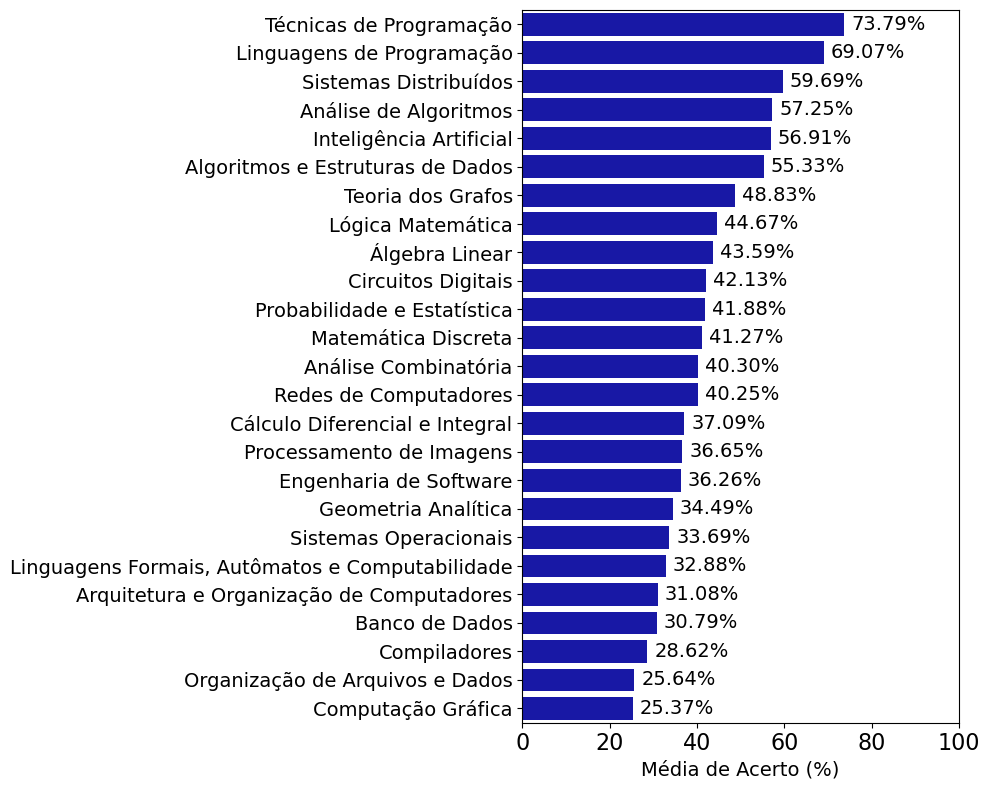

In [42]:
data = pd.DataFrame({'Tema': media_acertos.keys(), 'Média de Acerto (%)': media_acertos.values()})

data = data.sort_values('Média de Acerto (%)', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=data, y='Tema', x='Média de Acerto (%)', color='#0000BC')
plt.xlabel('Média de Acerto (%)', fontsize=14)
plt.ylabel('')
# plt.title('Média de Acerto por Tema')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

plt.xlim(right=100)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=14)

plt.tight_layout()
plt.savefig('../imagens/disci_mediaGeral2.pdf', bbox_inches='tight')
plt.show()

In [43]:
import pandas as pd

# Calculando as estatísticas por cluster
cluster_stats = dataset.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Exemplo de estatísticas para a variável 'matematica'
statistics_matematica = cluster_stats['matematica']

# Exemplo de estatísticas para a variável 'fundamentos_computacao'
statistics_fundamentos = cluster_stats['fundamentos_computacao']

statistics_tecnologia = cluster_stats['tecnologia_computacao']

KeyError: 'cluster'

In [ ]:
statistics_matematica

In [ ]:
statistics_fundamentos

In [ ]:
statistics_tecnologia

In [ ]:
import pandas as pd

# Calculando as estatísticas por cluster
cluster_stats = dataset.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Exemplo de estatísticas para a variável 'matematica'
statistics_matematica = cluster_stats['matematica']

# Exemplo de estatísticas para a variável 'fundamentos_computacao'
statistics_fundamentos = cluster_stats['fundamentos_computacao']

# Exemplo de estatísticas para a variável 'tecnologia_computacao'
statistics_tecnologia = cluster_stats['tecnologia_computacao']

# Exemplo de estatísticas para várias variáveis
statistics_variaveis = cluster_stats[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']]

# Exemplo de estatísticas específicas para um cluster específico
cluster1_stats = cluster_stats.loc[1]  # Estatísticas para o Cluster 1

# Exemplo de cálculo de proporção de cada cluster
cluster_proportions = dataset['cluster'].value_counts(normalize=True)

# Exemplo de estatísticas gerais do dataset inteiro
dataset_stats = dataset.describe()


In [ ]:
def plot_stacked_bar_chart(df, category_col, value_col, title, save_path=None):
    top_specialties = df[category_col].value_counts().head(10).index.tolist()

    df_top = df[df[category_col].isin(top_specialties)]

    df_grouped = df_top.groupby([category_col, 'SEXO']).size().unstack()

    df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values().index]

    ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

    ax.set_title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout() 
    ax.legend(['Feminino', 'Masculino'], loc='lower right')
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()

In [ ]:
def plot_faixa_etaria(dataset, save_path=None):
    faixa_etaria_counts = dataset['IDADE'].value_counts().sort_index()

    faixas_etarias = faixa_etaria_counts.index.tolist()

    plt.bar(faixas_etarias, faixa_etaria_counts)

    plt.xlabel('Faixa Etária')
    plt.ylabel('Número de Candidatos')
    plt.title('Distribuição de Faixa Etária dos Candidatos')
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cluster_nomeada = {
    0: 'inteligência artificial',
    1: 'engenharia de software'
}

In [ ]:
dataset_confusion = dataset.query('ESPECIALIDADE == "inteligência artificial" | ESPECIALIDADE == "engenharia de software"')

In [ ]:
dataset_confusion['cluster'] = dataset_confusion['cluster'].replace(cluster_nomeada)

In [ ]:
dataset_confusion

In [ ]:
y_teste = dataset_confusion['ESPECIALIDADE']
y_pred = dataset_confusion['cluster']

In [ ]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['inteligência artificial', 'engenharia de software'],
            yticklabels=['inteligência artificial', 'engenharia de software'])
plt.xlabel('Previsão')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')
plt.savefig('imagens/matriz_confusão.png', dpi=600)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia
acuracia = accuracy_score(y_teste, y_pred)
print("Acurácia:", acuracia)

In [ ]:
acuracia_porcentagem = acuracia * 100

print("Acurácia:", acuracia_porcentagem, "%")

#### Grupo 0

In [ ]:
dataset_g0 = dataset.query('cluster == 0')

In [ ]:
especialidades_gZero = dataset_g0['ESPECIALIDADE'].value_counts()[:10]
especialidades_gZero = pd.DataFrame(especialidades_gZero)

In [ ]:
def create_bar_areas(data, x, y, xlabel='', ylabel='', figsize=(10, 4), rotation=0, fontsize=12, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    # Plotar um gráfico de barras
    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#0000BC'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
create_bar_chart(
    data=especialidades_gZero,
    x='ESPECIALIDADE',
    y=especialidades_gZero.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoZero.eps'
)

In [ ]:
media_disciplina_zero = dataset_g0.iloc[:,7:32]
media_disciplina_zero = pd.DataFrame(media_disciplina_zero.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_zero = media_disciplina_zero.reset_index()

In [ ]:
grouped_data = dataset_g0.groupby('ESTADO')['ESPECIALIDADE'].value_counts()
grouped_data

In [ ]:
plot_stacked_bar_chart(dataset_g0, 'ESPECIALIDADE', 'SEXO', '', 'imagens/distribuicao_especialidade_sexo')

In [ ]:
# import pandas as pd

# # Substituir os valores numéricos dos estados pelos nomes
# dataset_g0['ESTADO'] = dataset_g0['ESTADO'].map(estados)

# # Agrupar os dados por estado e especialidade, e contar as ocorrências
# grouped_data = dataset_g0.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='Contagem')

# # Criar um DataFrame para armazenar os resultados
# resultados = pd.DataFrame(columns=['Estado', 'Especialidades'])

# # Iterar sobre os estados
# for estado in dataset_g0['ESTADO'].unique():
#     # Filtrar os dados do estado atual
#     df_estado = grouped_data[grouped_data['ESTADO'] == estado]
    
#     # Filtrar as quatro primeiras especialidades mais solicitadas
#     top_especialidades = df_estado.nlargest(4, 'Contagem')
    
#     # Criar uma lista com as especialidades formatadas
#     especialidades = [f"{especialidade}: {contagem}" for especialidade, contagem in zip(top_especialidades['ESPECIALIDADE'], top_especialidades['Contagem'])]
    
#     # Adicionar o resultado ao DataFrame
#     resultados = resultados.append({'Estado': estado, 'Especialidades': ', '.join(especialidades)}, ignore_index=True)

# # Exibir o DataFrame de resultados

# resultados.to_csv('resultados.txt', sep='\t', index=False)


In [ ]:
plot_faixa_etaria(dataset_g0, 'imagens/distribuicao_faixaEtaria')

#### Grupo 1

In [ ]:
dataset_g1 = dataset.query('cluster == 1')

In [ ]:
especialidades_gOne = dataset_g1['ESPECIALIDADE'].value_counts()[:10]
especialidades_gOne = pd.DataFrame(especialidades_gOne)

In [ ]:
create_bar_chart(
    data=especialidades_gOne,
    x='ESPECIALIDADE',
    y=especialidades_gOne.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoOne.eps'
)

In [ ]:
media_disciplina_one = dataset_g1.iloc[:,7:32]
media_disciplina_one = pd.DataFrame(media_disciplina_one.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_one = media_disciplina_one.reset_index()
# media_disciplina_one

In [ ]:
# Chamar o método para criar o gráfico de barras empilhadas
plot_stacked_bar_chart(dataset_g1, 'ESPECIALIDADE', 'SEXO', '', 'imagens/distribuicao_especialidade_sexoG1')

In [ ]:
plot_faixa_etaria(dataset_g1, 'imagens/distribuicao_faixaEtariaG1')

#### Grupo 2

In [ ]:
dataset_g2 = dataset.query('cluster == 2')

In [ ]:
especialidades_gTwo = dataset_g2['ESPECIALIDADE'].value_counts()[:10]
especialidades_gTwo = pd.DataFrame(especialidades_gTwo)

In [ ]:
create_bar_chart(
    data=especialidades_gTwo,
    x='ESPECIALIDADE',
    y=especialidades_gTwo.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoOne.eps'
)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dataset_db = dados.copy()
dataset_db = dataset_db.loc[:,['matematica','fund_computacao','tec_computacao']]
dataset_db

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(dataset_db)

print("Rótulos atribuídos:", labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_db['matematica'], dataset_db['fund_computacao'], dataset_db['tec_computacao'], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clustering com DBSCAN")
plt.show()

## Spectral Clustering

In [ ]:
dataset_sp = dados.iloc[:,33:36]
dataset_sp.head(1)

In [ ]:
# from sklearn.cluster import SpectralClustering

# spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
# labels_spectral = spectral.fit_predict(dataset_sp)

# print("Rótulos atribuídos:", labels_spectral)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dataset_sp['matematica'], dataset_sp['fundamentos_computacao'], dataset_sp['tecnologia_computacao'], c=labels_spectral)
# ax.set_xlabel("Feature 1")
# ax.set_ylabel("Feature 2")
# ax.set_zlabel("Feature 3")
# ax.set_title("Clustering com DBSCAN")
# plt.show()

## Agglomerative clustering

In [ ]:
dataset_agglomerative = dados.iloc[:,33:36]
dataset_agglomerative.head(1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
labels_agglomerative = agglomerative.fit_predict(dataset_agglomerative)


print("Rótulos atribuídos:", labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_agglomerative['matematica'], dataset_agglomerative['fundamentos_computacao'], dataset_agglomerative['tecnologia_computacao'], c=labels_agglomerative)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clustering com Agglomerative Clustering")
plt.show()

# Aplicações de Aprendizado de Máquina

### Árvore de Decisão

In [ ]:
# dados['PRESENTE'].unique()
dataframe_arvore = dataset.query('PRESENTE == "S"')

In [ ]:
dataframe_arvore = dataframe_arvore.loc[:,['matematica','fundamentos_computacao','tecnologia_computacao', 'cluster']]
dataframe_arvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

X = dataframe_arvore.drop('cluster', axis=1)  # Remova a coluna 'classe_alvo' do DataFrame
y = dataframe_arvore['cluster']  # Coluna 'classe_alvo' é a classe alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisão: {:.2f}%".format(accuracy * 100))


dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=list(map(str, y.unique())),
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("arvore_decisao")
graph.view()

#### Testar a funcionalidade do algoritmo

In [26]:
novo_poscomp = pd.read_csv('novo_poscomp.csv')
novo_poscomp.columns = ['Nome','Álgebra Linear','Análise Combinatória','Cálculo Diferencial e Integral','Geometria Analítica','Matemática Discreta','Probabilidade e Estatística','Lógica Matemática','Análise de Algoritmos','Algoritmos e Estruturas de Dados','Arquitetura e Organização de Computadores','Circuitos Digitais','Linguagens de Programação','Linguagens Formais, Autômatos e Computabilidade','Organização de Arquivos e Dados','Sistemas Operacionais','Técnicas de Programação','Teoria dos Grafos','Banco de Dados','Compiladores','Computação Gráfica','Engenharia de Software','Inteligência Artificial','Processamento de Imagens','Redes de Computadores','Sistemas Distribuídos','NOTA Prova TO']

FileNotFoundError: [Errno 2] No such file or directory: 'novo_poscomp.csv'

In [ ]:
list_poscomp = ['Álgebra Linear','Análise Combinatória','Cálculo Diferencial e Integral','Geometria Analítica','Matemática Discreta','Probabilidade e Estatística','Lógica Matemática','Análise de Algoritmos','Algoritmos e Estruturas de Dados','Arquitetura e Organização de Computadores','Circuitos Digitais','Linguagens de Programação','Linguagens Formais, Autômatos e Computabilidade','Organização de Arquivos e Dados','Sistemas Operacionais','Técnicas de Programação','Teoria dos Grafos','Banco de Dados','Compiladores','Computação Gráfica','Engenharia de Software','Inteligência Artificial','Processamento de Imagens','Redes de Computadores','Sistemas Distribuídos']

In [ ]:
novo_poscomp = novo_poscomp.drop('NOTA Prova TO', axis=1)

In [ ]:
novo_poscomp.head()

In [ ]:
for coluna in list_poscomp:
    novo_poscomp[coluna] = pd.to_numeric(novo_poscomp[coluna], errors='coerce').astype('Int64')

# Verificar o tipo de dado das colunas após a conversão
print(novo_poscomp.dtypes)

In [ ]:
novo_poscomp = novo_poscomp.dropna()

In [ ]:
X_novos = novo_poscomp.loc[:,['matematica','fundamentos_computacao','tecnologia_computacao']]

In [ ]:
X_novos.head()

In [ ]:
# Fazer previsões com o novo conjunto de dados
classe_prevista = clf.predict(X_novos)

# Exibir a classe prevista
print("Classe prevista: {}".format(classe_prevista))